<a href="https://colab.research.google.com/github/mauloredo/Challenge_Telecom_X/blob/main/Challenge_Telecom_X.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PRESENTACIÓN


## Introducción al problema


Telecom X enfrenta un desafío crítico: la pérdida de clientes a una tasa preocupante. La empresa busca comprender qué factores están impulsando el churn y cómo puede mejorar la retención de clientes.


Como analistas de datos, nuestra misión es explorar y entender las causas subyacentes de esta evasión para proporcionar información valiosa al equipo de ciencia de datos, quienes desarrollarán un modelo predictivo. A grandes rasgos el proyecto consiste en importar los datos, entenderlos para después limpiarlos y transformarlos, y posteriormente manipularlos para la identificación de patrones que conducen a la cancelación del servicio y generar insights clave que permitan tomar acciones estratégicas.

**Objetivo del Proyecto**

Realizar un Análisis Exploratorio de Datos (EDA) exhaustivo sobre la base de clientes de Telecom X. Buscamos identificar patrones, tendencias y relaciones clave entre las características de los clientes, los servicios que utilizan, su comportamiento de facturación y su estado de churn para proporcionar recomendaciones estratégicas. El resultado de este análisis servirá como base de datos limpia para la fase de modelado predictivo.

**Alcance del Proyecto**

- Extracción y Limpieza de Datos: Obtener datos de la API proporcionada y realizar un proceso completo de limpieza para asegurar su calidad y consistencia.
- Transformación de Datos: Reestructurar y formatear los datos para que sean adecuados para el análisis.
- Análisis Exploratorio: Utilizar estadísticas descriptivas, visualizaciones (gráficas de barras, cajas, dispersión, histogramas, mapas de calor) y pruebas estadísticas (Chi-Cuadrado) para identificar relaciones entre las variables y el churn.
- Identificación de Factores Clave: Determinar qué características de los clientes, servicios o comportamientos de facturación están más fuertemente asociados con el abandono.

**Estructura**

El entregable, es un Notebook de Google Colab completamente funcional que documenta todo el proceso de ETL (Extracción, Transformación y Carga) y el Análisis Exploratorio de Datos. En la primera parte del Notebook, se encuentra esta presentación, donde se explica el desarrollo del proyecto, y se presentan los resultados. En la segunda parte del Notebook se encuentra el código, tal y como se fue desarrollando.


## Desarrollo del Proyecto

### Extracción de datos

El dataset fue obtenido desde una API proporcionada, lo que nos permitió cargar los datos directamente en nuestro Notebook de Google Colab.
Para hacerlo, utilizamos Python y las librerías requests y pandas para realizar la conexión y obtener los datos en formato JSON. Luego, convertimos estos datos en un DataFrame de Pandas, lo que facilitó su manipulación.


### Estructura Inicial


El DataFrame inicial que importamos desde la API de Telecom X tiene una estructura en formato JSON, con información sobre clientes, servicios contratados y su estado de churn. A continuación una descripción general:

✅ Número de filas y columnas: (7267, 6)

✅ Nombres de columnas:

  customerID → Identificador único del cliente

  Churn → Estado de cancelación del servicio (Sí/No)

  customer → Datos generales del cliente (género, edad, pareja, dependientes)

  phone → Servicios de telefonía contratados (líneas múltiples, servicio activo)

  internet → Información del servicio de Internet (tipo de servicio, seguridad, respaldo)

  account → Detalles de facturación y tipo de contrato

✅ Tipos de datos de cada columna (df.dtypes)

  customerID object

  Churn object

  customer object

  phone object

  internet object

  account object

✅ NAN's, entradas vacías y valores nulos (df.isnull().sum())

  customerID 0 empty

  Churn 0 empty / 224 " "

  customer 0 empty

  phone 0 empty

  internet 0 empty

  account 0 empty

  0 "none" / 0 "N/A" / "unknown"

In [77]:
display(consulta_tipos_datos)

,,,,,,count
customerID,Churn,customer,phone,internet,account,
<class 'str'>,<class 'str'>,<class 'dict'>,<class 'dict'>,<class 'dict'>,<class 'dict'>,7267


### Explosión de datos

Para poder continuar con el projecto, fue indispensable tratar los diccionarios anidados.

Typos de datos por columna:


customerID <class 'str'>

Churn <class 'str'>

customer <class 'dict'>

phone <class 'dict'>

internet <class 'dict'>

account <class 'dict'>

A continuación las columnas del Dataframe después de tratar los diccionarios:

1. customerID
2. Churn
3. gender
4. SeniorCitizen
5. Partner
6. Dependents
7. tenure
8. PhoneService
9. MultipleLines
10. InternetService
11. OnlineSecurity
12. OnlineBackup
13. DeviceProtection
14. TechSupport
15. StreamingTV
16. StreamingMovies
17. Contract
18. PaperlessBilling
19. PaymentMethod
20. Charges.Monthly
21. Charges.Total

### ETL

Después de un analisis exploratorio inicial, se definen los tipos de datos con los cuales se tratará cada columna.


**Gender**

La columna Gender se transforma en dtype categoría. con 7043 entradas y solamente 2 unique´s se concluye que está limpia


**SeniorCitizen**

Actualmente como Int64, la columna contiene 0 y 1. El 0 se transforma a categoria.


**Partner**

Se convierte en categoria, mismo caso que Gender


**Dependents, PhoneService y PaperlessBilling**

Las 3 colunnas se transforman en categorías


**MultipleLines / InternetService / OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport / StreamingTV / StreamingMovies / Contract**

Con 3 tipos de entradas, las columnas se convierten en categorías


**PaymentMethod**

Con 4 diferentes tipos de entrada se transforma a Categoria

In [78]:
print(df_types)


                 current_type target_type
customerID             object        drop
Churn                  object        bool
gender                 object    category
SeniorCitizen           int64       int64
Partner                object    category
Dependents             object    category
tenure                  int64     float64
PhoneService           object    category
MultipleLines          object    category
InternetService        object    category
OnlineSecurity         object    category
OnlineBackup           object    category
DeviceProtection       object    category
TechSupport            object    category
StreamingTV            object    category
StreamingMovies        object    category
Contract               object    category
PaperlessBilling       object    category
PaymentMethod          object    category
Charges.Monthly       float64     float64
Charges.Total          object     float64


#### customerID

Como es un identificador único, no aporta valor al análisis de churn y solo ocupa espacio innecesario en el modelo.

#### Churn y las 224 entradas vacías

Antes que nada, se tiene que enfatisar la importancia de la variable "churn" en el estudio, ya que es la variable respuesta, en otras palabras, la variable cuyo comportamiento se encuentra en escrutinio. El tratamiento de sus entradas vacías es crucial. Se proponen 3 alternativas:

1. La asignación arbitraria de valores

Asignar 'Yes' o 'No' a las filas con valores faltantes en Churn introduce un sesgo significativo en el análisis, ya que se estarían generando datos sintéticos sin evidencia estadística que los respalde. Esta decisión podría alterar las distribuciones originales de la variable de salida, afectando la interpretación y precisión de cualquier modelo predictivo basado en estos datos.

Por lo tanto, en lugar de asignar valores artificiales, la mejor estrategia es eliminar estas filas o, en contextos exploratorios, tratarlas como un grupo independiente con el objetivo de analizar si existen relaciones sistemáticas entre la falta de información y otras variables.

2. La asignación de una tercera categoría

Si bien mantener todas las filas en el conjunto de datos es un enfoque válido para el análisis exploratorio, modificar la estructura de la variable Churn al incluir una categoría adicional (Desconocido) altera su naturaleza como variable binaria para la predicción (Sí / No). Esto implica que las filas con valores desconocidos no pueden utilizarse directamente en un modelo de predicción estándar de abandono de clientes.

Además, incluir una categoría "Desconocido" requeriría aplicar métodos estadísticos distintos, como pruebas de Chi-cuadrado y análisis de distribución, en lugar de técnicas tradicionales como la correlación de Pearson para variables numéricas o información mutua para categóricas. Esto puede sesgar la interpretación del impacto de las variables en la predicción del abandono.

3. La eliminación de las filas con entradas vacías

Dado que el propósito del proyecto es desarrollar un análisis predictivo centrado en la clasificación binaria del churn, eliminar las filas con valores faltantes sigue siendo la estrategia más adecuada para asegurar un conjunto de datos consistente y libre de ruido. No obstante, la propuesta de categorizar los valores faltantes es una opción válida en estudios exploratorios si el objetivo es conservar todos los registros y analizar patrones más amplios en la estructura de los datos.

Conclusión

Con solo un 3% de los datos con valores faltantes en la columna Churn, es poco probable que la creación de una tercera categoría aporte beneficios significativos al modelo predictivo y, en cambio, añadiría complejidad innecesaria. Eliminar esas filas es un enfoque común y práctico para preparar los datos en una tarea de clasificación binaria, como la predicción de abandono de clientes.

#### TotalCharges y 11 entradas vacías

Durante el proceso de limpieza de datos, identificamos que TotalCharges contenía 11 valores vacíos. Como esta columna representa el total facturado por cada cliente, era fundamental definir una estrategia adecuada para tratar estos valores ausentes.

**Decisión: Asignar el valor 0**

✅ Razón: Los valores vacíos en TotalCharges correspondían a clientes con tenure = 0, es decir, aquellos que acababan de iniciar su servicio y no tenían ningún historial de facturación acumulada.

✅ Solución: En lugar de eliminar estas filas, decidimos asignar TotalCharges = 0 para estos casos, ya que es coherente con su estado de nuevos clientes sin historial de pago previo.

Este método garantizó que no perdiéramos información valiosa sobre clientes recientes y que mantuviéramos la integridad del análisis.

Para mejorar la claridad y comprensión de los datos, realizamos ajustes en los nombres de algunas columnas:

#### Charges.Monthly y Charges.Total

Para mejorar la claridad y comprensión de los datos, realizamos ajustes en los nombres de algunas columnas:

✅ Charges.Monthly → MonthlyCharges

✅ Charges.Total → TotalCharges

#### Limpieza de datos

La siguiente consulta, fue crucial para determinar si las columnas estaban, o no, limpias. Lo primero se obserbava el count. a partir del count de cada columna, que era el mismo practicamente, se observaba los valores unique, verificando que la sumatoria de estos, diera el mismo count. En el caso de las columnas numéricas ese count, se verificaba el tipo de datos y se comparaba con los datos uniqueSe considera el tipo de datos, el número de entradas y los valores únicos y la sumatoria de NAN´s.

In [79]:
df_churn.describe(include='all')

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,2,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531
top,False,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,5174,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


Las columnnas categóricas, quedaron de la siguiente manera:

MultipleLines: ['No' 'Yes' 'No phone service']

InternetService: ['DSL' 'Fiber optic' 'No']

OnlineSecurity: ['No' 'Yes' 'No internet service']

OnlineBackup: ['Yes' 'No' 'No internet service']

DeviceProtection: ['No' 'Yes' 'No internet service']

TechSupport: ['Yes' 'No' 'No internet service']

StreamingTV: ['Yes' 'No' 'No internet service']

StreamingMovies: ['No' 'Yes' 'No internet service']

Contract: ['One year' 'Month-to-month' 'Two year']

### Análisis de datos

Por alguna razón, decidí comenzar el análisis con las columnas numéricas, tal vez porque solo eran tres y el análisis sería mas breve

#### Variables numéricas: Churn, tenure MonthlyCarges y TotalCharges

Como primer paso casi obligatorio, es gráficar la variable respuesta en torno a su distribución.



![Distribución de Churn](https://github.com/mauloredo/Challenge_Telecom_X/graficos/distribucion_churn.png)


# CÓDIGO Y DESARROLLO




## Extracción de datos

Para iniciar tu análisis, necesitarás importar los datos de la API de Telecom X. Estos datos están disponibles en formato JSON y contienen información esencial sobre los clientes, incluyendo datos demográficos, tipo de servicio contratado y estado de evasión.

📌 Enlace de la API:
https://github.com/ingridcristh/challenge2-data-science-LATAM/blob/main/TelecomX_Data.json

https://github.com/ingridcristh/challenge2-data-science-LATAM


###  Cargar los datos directamente desde la API utilizando Python.

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/mauloredo/Challenge_Telecom_X/main/TelecomX_Data.json"
df = pd.read_json(url)

df.head()


,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### Primera examinación de los datos

**Exploración General de los Datos**

✅ Número de filas y columnas: (7267, 6)

✅ Nombres de columnas:

customerID

Churn

customer

phone

internet

account


✅ Tipos de datos de cada columna (df.dtypes)

customerID	object

Churn	object

customer	object

phone	object

internet	object

account	object

**Calidad y Consistencia de los Datos**

✅ NAN's, entradas vacías y valores nulos (df.isnull().sum())

customerID	0 empty

Churn	0 empty / 224 " "

customer	0 empty

phone	0 empty

internet	0 empty

account	0 empty

0 "none" / 0 "N/A" / "unknown"





### Analizando la estructura / Explosión de Dicc´s

Para poder continuar con el análisis, es necesario tratar datos andidos, por lo que he dividido este primer vistazo en dos. El antes y el después de la explosión.

Typos de datos por columna:

- customerID	<class 'str'>
- Churn	<class 'str'>
- customer		<class 'dict'>
- phone	<class 'dict'>
- internet		<class 'dict'>
- account		<class 'dict'>
		<class 'dict'>	<class 'dict'>	<class 'dict'>	<class 'dict'>	7267

Analizando cada colunna, sabemos un poco mas sobre la información qe contienen
- customer: (gender, SeniorCitizen, etc.)
- phone:servicios de telefonía (phoneservices, multipleLines)
- internet (InternetService, OnlineSecurity)
- account (Contract, PaperlessBilling)

El Dataframe final, debiera tener las siguientes colunas
1. customerID
2. Churn
3. gender
4. SeniorCitizen
5. Partner
6. Dependents
7. tenure
8. PhoneService
9. MultipleLines
10. InternetService
11. OnlineSecurity
12. OnlineBackup
13. DeviceProtection
14. TechSupport
15. StreamingTV
16. StreamingMovies
17. Contract
18. PaperlessBilling
19. PaymentMethod
20. Charges.Monthly
21. Charges.Total




In [5]:
df.applymap(type).value_counts()


<ipython-input-5-2185598585>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  df.applymap(type).value_counts()


,,,,,,count
customerID,Churn,customer,phone,internet,account,
<class 'str'>,<class 'str'>,<class 'dict'>,<class 'dict'>,<class 'dict'>,<class 'dict'>,7267


In [6]:

consulta_tipos_datos = df.map(type).value_counts()


print(consulta_tipos_datos)


customerID     Churn          customer        phone           internet        account       
<class 'str'>  <class 'str'>  <class 'dict'>  <class 'dict'>  <class 'dict'>  <class 'dict'>    7267
Name: count, dtype: int64


In [7]:
df[['customer', 'phone', 'internet', 'account']].iloc[0]


,0
customer,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part..."
phone,"{'PhoneService': 'Yes', 'MultipleLines': 'No'}"
internet,"{'InternetService': 'DSL', 'OnlineSecurity': '..."
account,"{'Contract': 'One year', 'PaperlessBilling': '..."


In [8]:
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])


In [9]:
df_customer.head()


,gender,SeniorCitizen,Partner,Dependents,tenure
0,Female,0,Yes,Yes,9
1,Male,0,No,No,9
2,Male,0,No,No,4
3,Male,1,Yes,No,13
4,Female,1,Yes,No,3


In [10]:
df_phone.head()


,PhoneService,MultipleLines
0,Yes,No
1,Yes,Yes
2,Yes,No
3,Yes,No
4,Yes,No


In [11]:
df_internet.head()


,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,DSL,No,Yes,No,Yes,Yes,No
1,DSL,No,No,No,No,No,Yes
2,Fiber optic,No,No,Yes,No,No,No
3,Fiber optic,No,Yes,Yes,No,Yes,Yes
4,Fiber optic,No,No,No,Yes,Yes,No


In [12]:
df_account.head()

,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,One year,Yes,Mailed check,65.6,593.3
1,Month-to-month,No,Mailed check,59.9,542.4
2,Month-to-month,Yes,Electronic check,73.9,280.85
3,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Month-to-month,Yes,Mailed check,83.9,267.4


In [13]:
(df == "").sum()


,0
customerID,0
Churn,224
customer,0
phone,0
internet,0
account,0


In [14]:
(df == " ").sum()


,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [15]:
(df == "N/A").sum()




,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


In [16]:
(df == "none").sum()

,0
customerID,0
Churn,0
customer,0
phone,0
internet,0
account,0


### Convertir los datos a un DataFrame de Pandas para facilitar su manipulación.

In [17]:
df_final = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df_final.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


### Reestructuración del Análisis exploratorio y Resultados

Con los resultados que obtuvimos en la priera parte, es necesario explotar el dataframe y comenszar nuevamente el análisis de la siguiente manera:

1️⃣ Revisión General del Dataset

- Número de filas y columnas  ***7267 entries, 0 to 7266/ (total 21 columns):***

- Nombres de columnas ***Identificadas anteriormente***

- Tipos de datos después de la explosión ***https://colab.research.google.com/drive/1NYrmyO1IQNW4CePKhMzZP5vJBcHjQE1h#scrollTo=__UK-2TMnBMU&line=1&uniqifier=1***

2️⃣ Calidad y Consistencia de los Datos

- Valores nulos, vacíos ("") ("none") ("N/A") o inconsistentes

- Frecuencia de categorías poco comunes

3️⃣ Estructura de Datos (ya hemos revisado diccionarios)

- Detección de variables categóricas vs. numéricas

- Evaluación de valores únicos

4️⃣ Análisis de Duplicados

- Filas repetidas o valores sospechosamente similares

5️⃣ Formatos Correctos

- Capitalización y espacios extra

- Conversión de valores a tipos apropiados (int, float, bool)

***https://colab.research.google.com/drive/1NYrmyO1IQNW4CePKhMzZP5vJBcHjQE1h#scrollTo=3pQPuU4iokqm&line=2&uniqifier=1***



In [18]:
df_final.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [19]:
df_final.describe(include='all')


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7267,7267,7267,7267.000000,7267,7267,7267.000000,7267,7267,7267,...,7267,7267,7267,7267,7267,7267,7267,7267,7267.000000,7267
unique,7267,3,2,NaN,2,2,NaN,2,3,3,...,3,3,3,3,3,3,2,4,NaN,6531
top,9995-HOTOH,No,Male,NaN,No,No,NaN,Yes,No,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,1,5174,3675,NaN,3749,5086,NaN,6560,3495,3198,...,3182,3195,3582,2896,2870,4005,4311,2445,NaN,11
mean,NaN,NaN,NaN,0.162653,NaN,NaN,32.346498,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.720098,NaN
std,NaN,NaN,NaN,0.369074,NaN,NaN,24.571773,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.129572,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.425000,NaN
50%,NaN,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.300000,NaN
75%,NaN,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.875000,NaN


COMENTARIOS


count: todas las columnas cuentan con 7267 datos
unique: hay varias columnas que se esperan valores booleanos, sin emgargo hay 3 valores de respuesta.


In [20]:
(df_final == "").sum()


,0
customerID,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0


## Selección, Transformación y Corrección de Datos

1. Definiendo data types para cada columna: Ya sabemos las columnas, y que tipos de datos tiene, ahora vamos a agregar un "target type"

In [21]:
import pandas as pd

# Define the full set of columns with current and target data types
data_types = {
    'customerID': ['object', 'drop'],
    'Churn': ['object', 'bool'],
    'gender': ['object', 'category'],
    'SeniorCitizen': ['int64', 'int64'],
    'Partner': ['object', 'category'],
    'Dependents': ['object', 'category'],
    'tenure': ['int64', 'float64'],
    'PhoneService': ['object', 'category'],
    'MultipleLines': ['object', 'category'],
    'InternetService': ['object', 'category'],
    'OnlineSecurity': ['object', 'category'],
    'OnlineBackup': ['object', 'category'],
    'DeviceProtection': ['object', 'category'],
    'TechSupport': ['object', 'category'],
    'StreamingTV': ['object', 'category'],
    'StreamingMovies': ['object', 'category'],
    'Contract': ['object', 'category'],
    'PaperlessBilling': ['object', 'category'],
    'PaymentMethod': ['object', 'category'],
    'Charges.Monthly': ['float64', 'float64'],
    'Charges.Total': ['object', 'float64']
}

# Create the corrected DataFrame
df_types = pd.DataFrame.from_dict(data_types, orient='index', columns=['current_type', 'target_type'])

# Display the DataFrame
print(df_types)




                 current_type target_type
customerID             object        drop
Churn                  object        bool
gender                 object    category
SeniorCitizen           int64       int64
Partner                object    category
Dependents             object    category
tenure                  int64     float64
PhoneService           object    category
MultipleLines          object    category
InternetService        object    category
OnlineSecurity         object    category
OnlineBackup           object    category
DeviceProtection       object    category
TechSupport            object    category
StreamingTV            object    category
StreamingMovies        object    category
Contract               object    category
PaperlessBilling       object    category
PaymentMethod          object    category
Charges.Monthly       float64     float64
Charges.Total          object     float64


2. Filtrar las columnas relevante para el objetivo del projecto: Columnas escenciales, datos atados a los indicadores churn como customer tenure billing behavior, service usage. Remover columnas redundantes e irrelevantes.

In [22]:
# Crear una copia del dataframe sin la columna customerID
Dataframe = df_final.drop(columns=['customerID'])

# Verificar la estructura después de la eliminación
print(Dataframe.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7267 non-null   object 
 1   gender            7267 non-null   object 
 2   SeniorCitizen     7267 non-null   int64  
 3   Partner           7267 non-null   object 
 4   Dependents        7267 non-null   object 
 5   tenure            7267 non-null   int64  
 6   PhoneService      7267 non-null   object 
 7   MultipleLines     7267 non-null   object 
 8   InternetService   7267 non-null   object 
 9   OnlineSecurity    7267 non-null   object 
 10  OnlineBackup      7267 non-null   object 
 11  DeviceProtection  7267 non-null   object 
 12  TechSupport       7267 non-null   object 
 13  StreamingTV       7267 non-null   object 
 14  StreamingMovies   7267 non-null   object 
 15  Contract          7267 non-null   object 
 16  PaperlessBilling  7267 non-null   object 


In [23]:
(Dataframe == "").sum()

,0
Churn,224
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


3. Transformar vs Limpiar:

A pesar de que algunas variables presentan una distribución cercana al equilibrio (como gender) o están altamente sesgadas hacia un extremo, se decide conservarlas, ya que su interacción con otras características podría proporcionar información valiosa sobre patrones de comportamiento. Se excluye únicamente la variable customerID, dado que es un identificador único sin valor predictivo dentro del análisis de churn.

Este enfoque permite preservar variables potencialmente relevantes, asegurando que cualquier sesgo existente sea examinado en relación con otras características antes de la selección final.

Dependiendo del caso de cada colunna, se decidira si se limpia primero o se transforma primero dependiendo si hay mjuchos valores faltantes, o si requiere reestructuración.

#### La columna 'churn' y sus 224 entradas faltantes

Antes que nada, se tiene que enfatisar la importancia de la variable "churn" en el estudio, ya que es la **variable respuesta**, en otras palabras, la variable cuyo comportamiento se encuentra en escrutinio. El tratamiento de sus entradas vacías es crucial. Se proponen 3 alternativas:

**1. La asignación arbitraria de valores**

Asignar 'Yes' o 'No' a las filas con valores faltantes en Churn introduce un sesgo significativo en el análisis, ya que se estarían generando datos sintéticos sin evidencia estadística que los respalde. Esta decisión podría alterar las distribuciones originales de la variable de salida, afectando la interpretación y precisión de cualquier modelo predictivo basado en estos datos.

Desde una perspectiva probabilística, este tipo de imputación se asemeja a un supuesto de "Missing Completely at Random (MCAR)", lo cual difícilmente aplica si la ausencia de datos responde a patrones específicos relacionados con características de los clientes o condiciones del servicio.

Por lo tanto, en lugar de asignar valores artificiales, la mejor estrategia es eliminar estas filas o, en contextos exploratorios, tratarlas como un grupo independiente con el objetivo de analizar si existen relaciones sistemáticas entre la falta de información y otras variables.

**2. La asignación de una tercera categoría**

Si bien mantener todas las filas en el conjunto de datos es un enfoque válido para el análisis exploratorio, modificar la estructura de la variable Churn al incluir una categoría adicional (Desconocido) altera su naturaleza como variable binaria para la predicción (Sí / No). Esto implica que las filas con valores desconocidos no pueden utilizarse directamente en un modelo de predicción estándar de abandono de clientes.

Además, incluir una categoría "Desconocido" requeriría aplicar métodos estadísticos distintos, como pruebas de Chi-cuadrado y análisis de distribución, en lugar de técnicas tradicionales como la correlación de Pearson para variables numéricas o información mutua para categóricas. Esto puede sesgar la interpretación del impacto de las variables en la predicción del abandono.

**3. La eliminación de las filas con entradas vacías**

Dado que el propósito del proyecto es desarrollar un análisis predictivo centrado en la clasificación binaria del churn, eliminar las filas con valores faltantes sigue siendo la estrategia más adecuada para asegurar un conjunto de datos consistente y libre de ruido. No obstante, la propuesta de categorizar los valores faltantes es una opción válida en estudios exploratorios si el objetivo es conservar todos los registros y analizar patrones más amplios en la estructura de los datos.

**Conclusión**

Con solo un 3% de los datos con valores faltantes en la columna Churn, es poco probable que la creación de una tercera categoría aporte beneficios significativos al modelo predictivo y, en cambio, añadiría complejidad innecesaria. Eliminar esas filas es un enfoque común y práctico para preparar los datos en una tarea de clasificación binaria, como la predicción de abandono de clientes.

Además, incluir una categoría "Desconocido" podría distorsionar la interpretación del modelo, ya que el objetivo es identificar patrones de comportamiento claros entre clientes que sí o no han abandonado el servicio. En este contexto, la eliminación de filas con valores faltantes en Churn garantiza que el conjunto de datos esté bien estructurado y alineado con los requerimientos de una clasificación binaria efectiva.

**Gender**

La columna Gender se transforma en dtype categoría. con 7043 entradas y solamente 2 unique´s se concluye que está limpia

**SeniorCitizen**

Actualmente como Int64, la columna contiene 0 y 1. El 0 se transforma a categoria.

**Partner**

Se convierte en categoria, mismo caso que Gender

**Dependents, PhoneService y PaperlessBilling**

Las 3 colunnas se transforman en categorías

**MultipleLines / InternetService / OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport / StreamingTV / StreamingMovies / Contract**

Con 3 tipos de entradas, las columnas se convierten en categorías

**PaymentMethod**

Con 4 diferentes tipos de entrada se transforma a Categoria

In [24]:
# La columna 'churn' y sus 224 entradas faltantes
Dataframe['Churn'].isnull().sum()

np.int64(0)

In [25]:
print(Dataframe['Churn'].unique())


['No' 'Yes' '']


In [26]:
df_churn = Dataframe[Dataframe['Churn'] != '']
df_churn.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,No,Female,0,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,No,Male,0,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,Yes,Male,0,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [27]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 
 17  

In [28]:
df_churn.reset_index(drop=True, inplace=True)


In [29]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [30]:
df_churn['Churn'] = df_churn['Churn'].map({'Yes': True, 'No': False})
df_churn.head()
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Churn             7043 non-null   bool   
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [31]:
df_churn.describe(include='all')

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,2,2,NaN,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531
top,False,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,5174,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [32]:
df_churn['gender'] = df_churn['gender'].astype('category')


<ipython-input-32-1202194325>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_churn['gender'] = df_churn['gender'].astype('category')


In [33]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   int64   
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [34]:
df_churn['SeniorCitizen'].sample(20, random_state=42)


,SeniorCitizen
185,0
2715,0
3825,0
1807,0
132,0
1263,1
3732,1
1672,0
811,0
2526,0


In [35]:
df_churn_senior = df_churn.copy()
df_churn_senior["SeniorCitizen"] = df_churn_senior["SeniorCitizen"].astype(bool)
df_churn_senior.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   object  
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

In [36]:
df_churn_senior.head()

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,False,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,True,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,True,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,True,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [37]:
df_churn_partner = df_churn_senior.copy()
df_churn_partner["Partner"] = df_churn_partner["Partner"].astype("category")
df_churn_partner.info()
df_churn_partner.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   object  
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   object  
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,False,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,True,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,True,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,True,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [38]:
df_churn_category = df_churn_partner.copy()
df_churn_category["Dependents"] = df_churn_category["Dependents"].astype("category")
df_churn_category["PhoneService"] = df_churn_category["PhoneService"].astype("category")
df_churn_category["PaperlessBilling"] = df_churn_category["PaperlessBilling"].astype("category")
df_churn_category.info()
df_churn_category.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   object  
 8   InternetService   7043 non-null   object  
 9   OnlineSecurity    7043 non-null   object  
 10  OnlineBackup      7043 non-null   object  
 11  DeviceProtection  7043 non-null   object  
 12  TechSupport       7043 non-null   object  
 13  StreamingTV       7043 non-null   object  
 14  StreamingMovies   7043 non-null   object  
 15  Contract          7043 non-null   object  
 16  PaperlessBilling  7043 n

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,False,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,False,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,True,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,True,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,True,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [39]:
df_churn_category.describe(include='all')

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
count,7043,7043,7043,7043,7043,7043.000000,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043
unique,2,2,2,2,2,NaN,2,3,3,3,3,3,3,3,3,3,2,4,NaN,6531
top,False,Male,False,No,No,NaN,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,20.2
freq,5174,3555,5901,3641,4933,NaN,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,NaN,11
mean,NaN,NaN,NaN,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN
std,NaN,NaN,NaN,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN
min,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN
25%,NaN,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN
50%,NaN,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN
75%,NaN,NaN,NaN,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN


In [40]:
columns_to_check = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup", "DeviceProtection",
                    "TechSupport", "StreamingTV", "StreamingMovies", "Contract"]

for col in columns_to_check:
    print(f"{col}: {df_churn_category[col].unique()}")


MultipleLines: ['No' 'Yes' 'No phone service']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['Yes' 'No' 'No internet service']
StreamingTV: ['Yes' 'No' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['One year' 'Month-to-month' 'Two year']


In [41]:
df_churn_services = df_churn_category.copy()

columns_to_convert = ["MultipleLines", "InternetService", "OnlineSecurity", "OnlineBackup",
                      "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "Contract"]

for col in columns_to_convert:
    df_churn_services[col] = df_churn_services[col].astype("category")


In [42]:
df_churn_services.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [43]:
df_churn_services['PaymentMethod'].unique()

array(['Mailed check', 'Electronic check', 'Credit card (automatic)',
       'Bank transfer (automatic)'], dtype=object)

In [44]:
df_churn_payment = df_churn_services.copy()
df_churn_payment["PaymentMethod"] = df_churn_payment["PaymentMethod"].astype("category")
df_churn_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [45]:
#TREATING TENURE

df_churn_payment['tenure'].isna().sum()  # Counts actual missing values
df_churn_payment['tenure'].unique()  # Displays unique values including potential NaNs


array([ 9,  4, 13,  3, 71, 63,  7, 65, 54, 72,  5, 56, 34,  1, 45, 50, 23,
       55, 26, 69, 37, 49, 66, 67, 20, 43, 59, 12, 27,  2, 25, 29, 14, 35,
       64, 39, 40, 11,  6, 30, 70, 57, 58, 16, 32, 33, 10, 21, 61, 15, 44,
       22, 24, 19, 47, 62, 46, 52,  8, 60, 48, 28, 41, 53, 68, 31, 36, 17,
       18, 51, 38, 42,  0])

4. Se correrán tests para verificar que los datos estén listos para ser analisados

In [46]:
df_churn_payment[['tenure']].sample(n=100, random_state=42)



,tenure
185,32
2715,72
3825,71
1807,3
132,8
...,...
1379,49
734,1
3802,12
2167,19


In [47]:
df_churn_payment.rename(columns={'Charges.Monthly': 'MonthlyCharges'}, inplace=True)
df_churn_payment.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Charges.Total
0,False,Female,False,Yes,Yes,9,Yes,No,DSL,No,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,False,Male,False,No,No,9,Yes,Yes,DSL,No,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,True,Male,False,No,No,4,Yes,No,Fiber optic,No,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,True,Male,True,Yes,No,13,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,True,Female,True,Yes,No,3,Yes,No,Fiber optic,No,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [48]:
df_churn_payment.rename(columns={'Charges.Total': 'TotalCharges'}, inplace=True)
df_churn_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [49]:
df_churn_payment['MonthlyCharges'].isna().sum()


np.int64(0)

In [50]:
df_churn_payment['MonthlyCharges'].describe()


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


In [51]:
df_churn_payment['TotalCharges'].dtype  # Confirm current dtype


dtype('O')

In [52]:

df_churn_payment['TotalCharges'].str.isnumeric().sum()  # Count numeric entries



np.int64(324)

In [53]:
df_churn_payment.isna().sum()  # Check if there are missing values

,0
Churn,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [54]:
df_churn_payment['TotalCharges'] = pd.to_numeric(df_churn_payment['TotalCharges'], errors='coerce')


### La columna TotalCharges y sus 11 entradas faltantes

In [55]:
df_churn_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

In [56]:
df_churn_payment[df_churn_payment['TotalCharges'].isna()]


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
945,False,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN
1731,False,Female,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN
1906,False,Male,False,No,Yes,0,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,NaN
2025,False,Male,False,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN
2176,False,Male,False,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN
2250,False,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN
2855,False,Female,False,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN
3052,False,Male,False,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN
3118,False,Female,False,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN
4054,False,Female,False,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN


In [57]:
df_churn_payment = df_churn_payment.assign(TotalCharges=df_churn_payment['TotalCharges'].fillna(0))


In [58]:
df_churn_payment[df_churn_payment['TotalCharges'].isna()]

,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges


In [59]:
clean_df = df_churn_payment.copy()


In [60]:
clean_df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   Churn             7043 non-null   bool    
 1   gender            7043 non-null   category
 2   SeniorCitizen     7043 non-null   bool    
 3   Partner           7043 non-null   category
 4   Dependents        7043 non-null   category
 5   tenure            7043 non-null   int64   
 6   PhoneService      7043 non-null   category
 7   MultipleLines     7043 non-null   category
 8   InternetService   7043 non-null   category
 9   OnlineSecurity    7043 non-null   category
 10  OnlineBackup      7043 non-null   category
 11  DeviceProtection  7043 non-null   category
 12  TechSupport       7043 non-null   category
 13  StreamingTV       7043 non-null   category
 14  StreamingMovies   7043 non-null   category
 15  Contract          7043 non-null   category
 16  PaperlessBilling  7043 n

##Análisis datos numéricos

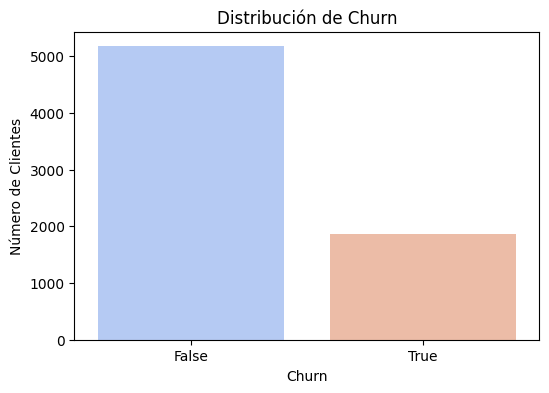

In [61]:
# Exploración visual del churn, verificando la distribución de la valiable Churn

import matplotlib.pyplot as plt
import seaborn as sns

# Contar valores de Churn
churn_counts = clean_df['Churn'].value_counts()

# Gráfico de barras
plt.figure(figsize=(6, 4))
sns.barplot(x=churn_counts.index, y=churn_counts.values, hue=churn_counts.index, palette='coolwarm', legend=False)
plt.xlabel('Churn')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Churn')
plt.savefig('distribucion_churn.png')
plt.show()


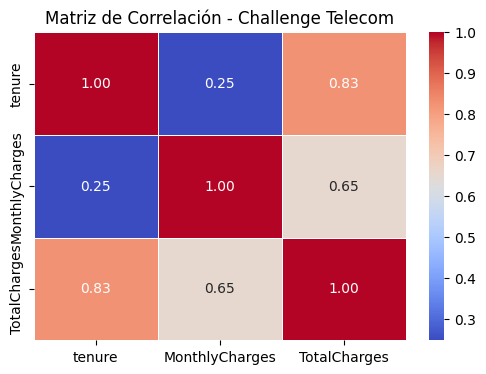

In [62]:
# Filtrar solo columnas numéricas
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
numeric_df = clean_df[numeric_cols]

# Matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Matriz de Correlación - Challenge Telecom")
plt.show()

- La fuerte correlación entre tenure y TotalCharges es esperada.

- La moderada correlación entre MonthlyCharges y TotalCharges también es razonable.

- La débil correlación entre tenure y MonthlyCharges es una observación clave. Indica que simplemente tener una larga permanencia en la empresa no predice necesariamente tarifas mensuales altas.

<ipython-input-63-2851182059>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clean_df['Churn'], y=clean_df['tenure'], palette='coolwarm')


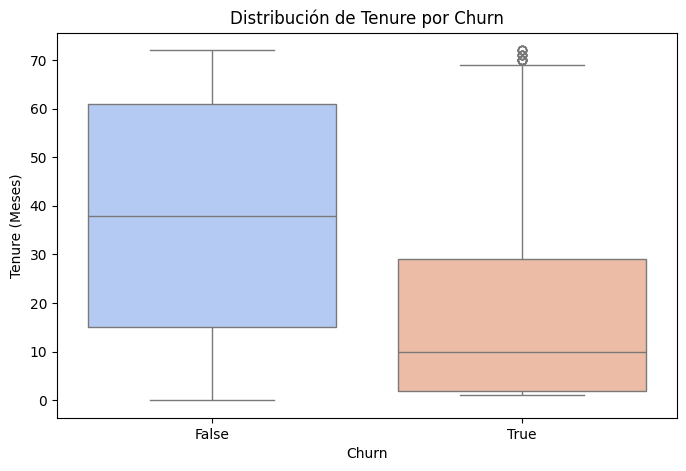

In [63]:
#ANALISANDO EL COMPORTAMIENTO DE CHURN Y SU RELACIÓN CON LAS VARIABLES NUMÉRICAS

#Distribución de tenure por Churn
plt.figure(figsize=(8, 5))
sns.boxplot(x=clean_df['Churn'], y=clean_df['tenure'], palette='coolwarm')
plt.xlabel('Churn')
plt.ylabel('Tenure (Meses)')
plt.title('Distribución de Tenure por Churn')
plt.show()


Clientes que NO abandonaron (False): La caja de los clientes que permanecen en la empresa es más ancha y está desplazada hacia valores altos de tenure. Esto indica que la mayoría de los clientes leales han sido suscriptores durante más tiempo. La mediana del tenure en este grupo es significativamente mayor que la de los clientes que han abandonado.


Clientes que SÍ abandonaron (True): La caja de los clientes que han churned es más estrecha y concentrada en tenure bajo. Esto confirma lo observado en el gráfico de dispersión, donde los clientes que abandonan tienden a haber estado en la empresa por un periodo más corto. La mediana del tenure en estos clientes es considerablemente menor.


Los valores atípicos por encima del límite superior indican que hay algunos clientes que han abandonado el servicio a pesar de tener una tenure relativamente larga en comparación con la mayoría de los clientes que han churned.


Si bien la mayoría de los clientes que abandonan tienen un tenure corto, estos outliers sugieren que podrían existir otros factores además del tenure bajo y las tarifas mensuales altas que influyen en el churn. Estos factores podrían estar relacionados con:


- Problemas específicos con el servicio que afectaron la experiencia del cliente.

- Cambios en sus necesidades que los llevaron a buscar otro proveedor.

- Razones personales que no están capturadas solo con tenure y MonthlyCharges.

<ipython-input-64-2918751593>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clean_df['Churn'], y=clean_df['MonthlyCharges'], palette='coolwarm')


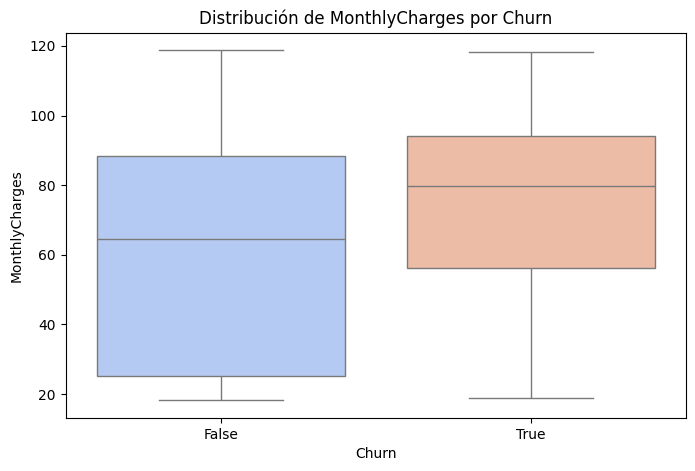

In [64]:
#Distribución de MonthlyCharges por Churn

plt.figure(figsize=(8, 5))
sns.boxplot(x=clean_df['Churn'], y=clean_df['MonthlyCharges'], palette='coolwarm')
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
plt.title('Distribución de MonthlyCharges por Churn')
plt.show()


Este gráfico de cajas ofrece información sobre cómo varía la distribución de los cargos mensuales entre los clientes que han abandonado el servicio y los que no lo han hecho:

- Clientes que NO han abandonado (False)
La caja de los clientes que permanecen en la empresa muestra una distribución más amplia de MonthlyCharges, con la mediana ubicada en el rango bajo a medio de los cargos mensuales.

Existen clientes con tarifas tanto bajas como altas, pero la distribución tiende a estar sesgada hacia valores más bajos.

- Clientes que SÍ han abandonado (True)
La caja de los clientes que han churned está desplazada hacia tarifas más altas.

La mediana del MonthlyCharges en este grupo es considerablemente mayor que la de los clientes que permanecen.

Esto sugiere que los clientes con facturas más elevadas tienen mayor tendencia a abandonar.

- Conclusión
Este gráfico refuerza la idea de que tarifas mensuales altas están asociadas con una mayor probabilidad de churn. Al combinar esto con la observación previa de que los clientes que abandonan suelen tener menos tenure, se resalta un posible problema: los clientes nuevos con tarifas altas son un grupo de alto riesgo de cancelació

<ipython-input-65-3013221906>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clean_df['Churn'], y=clean_df['TotalCharges'], palette='coolwarm')


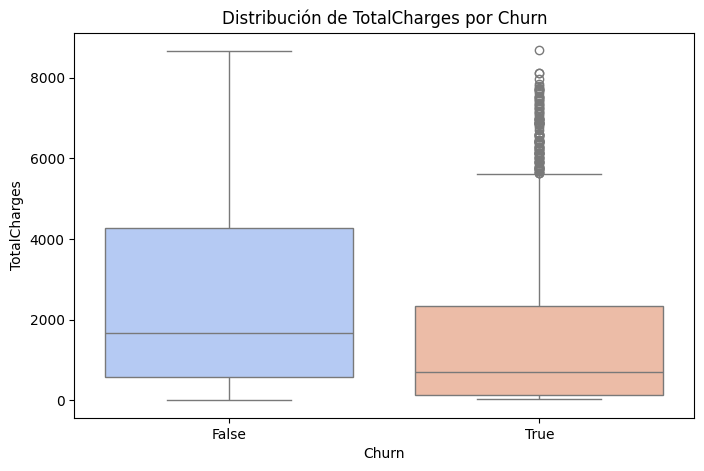

In [65]:
# Distribución de TotalCharges por Churn

plt.figure(figsize=(8, 5))
sns.boxplot(x=clean_df['Churn'], y=clean_df['TotalCharges'], palette='coolwarm')
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
plt.title('Distribución de TotalCharges por Churn')
plt.show()


Esta tendencia es crucial para el análisis del churn porque sugiere que la empresa podría estar perdiendo clientes de mayor valor en lugar de fidelizarlos con incentivos. Los clientes más antiguos suelen ser los que generan ingresos sostenidos, y si están cancelando, es probable que perciban el servicio como costoso sin suficientes beneficios adicionales.

Para verificar si la empresa realmente "le encaja el diente" a sus clientes más leales, podemos investigar:

1. Relación entre tenure y aumentos de tarifa: ¿Los clientes con mayor tenure han visto aumentos graduales en sus MonthlyCharges? ¿Hay diferencias significativas entre contratos de corto plazo vs. largo plazo?

2. Impacto del tipo de contrato en el churn: ¿Los clientes con dos años de contrato presentan más abandonos que los de contrato mensual? ¿Las tarifas de estos contratos son comparables con nuevos clientes?

3. Análisis del PaymentMethod: ¿Los clientes que pagan con Mailed Check enfrentan más churn por posibles retrasos o menos flexibilidad? ¿Hay algún método de pago que esté más relacionado con clientes antiguos y más propensos a abandonar?

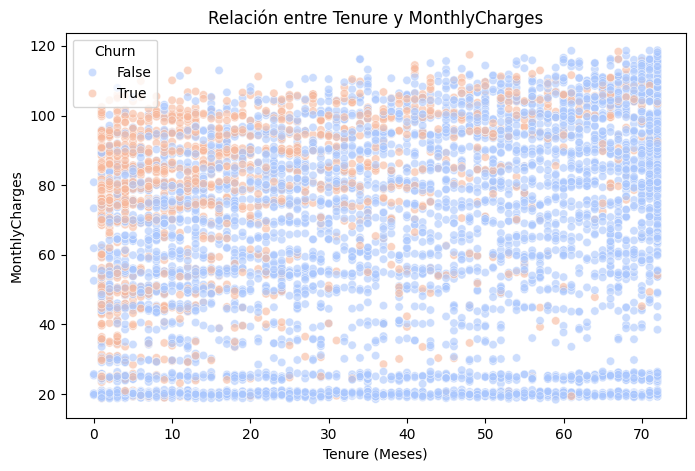

In [66]:
#verificar si los clientes con mayor tenure han visto aumentos progresivos en sus tarifas

plt.figure(figsize=(8, 5))
sns.scatterplot(x=clean_df['tenure'], y=clean_df['MonthlyCharges'], hue=clean_df['Churn'], palette='coolwarm', alpha=0.6)
plt.xlabel('Tenure (Meses)')
plt.ylabel('MonthlyCharges')
plt.title('Relación entre Tenure y MonthlyCharges')
plt.show()

Tenure and Churn: The plot shows that customers with longer tenure (more months) are less likely to churn (blue dots are more prevalent at higher tenure). Conversely, customers with shorter tenure (fewer months) are more likely to churn (orange/red dots are concentrated at lower tenure). This is a common pattern in churn analysis; loyal customers tend to stay longer.
Monthly Charges and Churn: While there isn't a perfect linear relationship, the plot does show that among customers with short tenure, those with higher Monthly Charges seem to have a higher propensity to churn. This aligns with your idea that higher charges can lead to churn, but it appears to be more impactful for newer customers.
Tenure and Monthly Charges: The scatter plot doesn't strongly suggest that longer tenure directly causes higher MonthlyCharges. You can see customers with long tenure having a wide range of monthly charges. The correlation heatmap we looked at earlier also showed only a weak correlation between tenure and MonthlyCharges.
So, to clarify, the plot does not show that customers with longer tenure have higher monthly charges and churn more because of it. Instead, it shows that shorter tenure is a significant indicator of churn, especially when combined with higher monthly charges. Customers who stay longer (high tenure) are generally more stable and less likely to leave, regardless of their monthly charges (though other factors could still influence their decision).

## Análisis datos categóricos

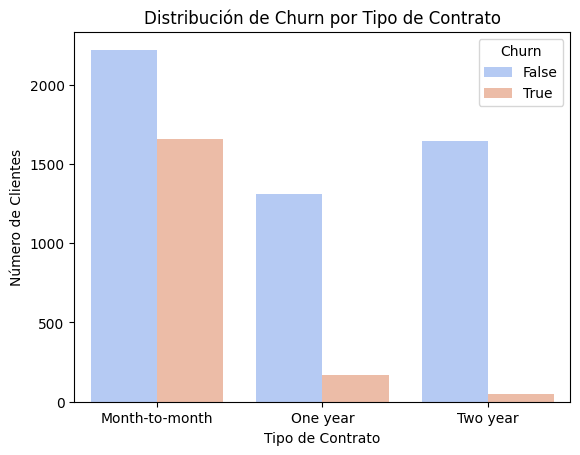

In [67]:
#diferencias significativas entre contratos de corto vs. largo plazo

sns.countplot(x=clean_df['Contract'], hue=clean_df['Churn'], palette='coolwarm')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Churn por Tipo de Contrato')
plt.show()


Este gráfico muestra claramente la relación entre el tipo de contrato y la probabilidad de que un cliente haya abandonado el servicio (Churn):

- Mes a mes (Month-to-month)
Es el tipo de contrato con mayor cantidad de clientes churned por un margen significativo.

Aunque hay una gran cantidad de clientes que no han abandonado, la proporción de churn dentro de este grupo es mucho más alta en comparación con los otros tipos de contrato.

- Contrato de un año (One year)
Tiene considerablemente menos clientes churned que los contratos de mes a mes.

La mayoría de los clientes con contrato de un año permanecen en la empresa.

- Contrato de dos años (Two year)
Es el tipo de contrato con la menor cantidad de clientes churned.

La gran mayoría de los clientes con contratos de dos años sigue con la empresa.

- Conclusión
Este gráfico sugiere que el tipo de contrato es un factor clave en el churn. Los clientes con contratos mes a mes tienen mucho mayor probabilidad de abandonar en comparación con los contratos de uno o dos años. Esto podría deberse a que:

Los contratos mensuales ofrecen más flexibilidad, lo que facilita la cancelación.

Los contratos largos implican mayor compromiso y pueden incluir incentivos o precios más atractivos para fomentar la retención.

Este hallazgo es crucial para entender los impulsores del churn y para diseñar estrategias efectivas de retención de clientes.

In [68]:
#clientes con contrato de dos años presentan más abandono que los de contrato mensual
contract_churn = clean_df.groupby('Contract')['Churn'].mean()
contract_churn



<ipython-input-68-3080771096>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  contract_churn = clean_df.groupby('Contract')['Churn'].mean()


,Churn
Contract,
Month-to-month,0.427097
One year,0.112695
Two year,0.028319


<ipython-input-69-1988942033>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=clean_df['Contract'], y=clean_df['MonthlyCharges'], palette='coolwarm')


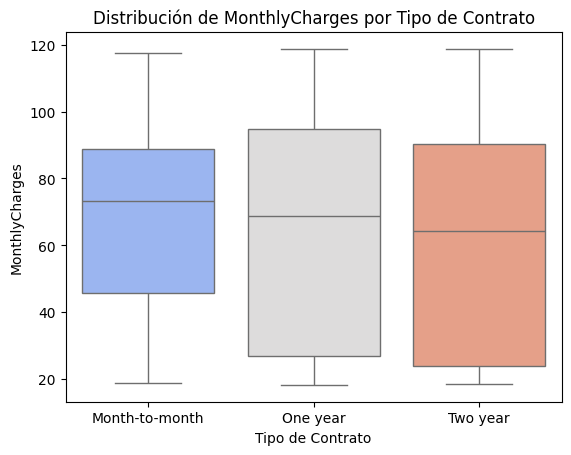

In [69]:
#Las tarifas de los contratos largos son comparables con las de nuevos clientes

sns.boxplot(x=clean_df['Contract'], y=clean_df['MonthlyCharges'], palette='coolwarm')
plt.xlabel('Tipo de Contrato')
plt.ylabel('MonthlyCharges')
plt.title('Distribución de MonthlyCharges por Tipo de Contrato')
plt.show()


Según este gráfico, hay diferencias visibles en la distribución de MonthlyCharges según el tipo de contrato. Los contratos mes a mes parecen estar asociados con tarifas mensuales más altas en promedio

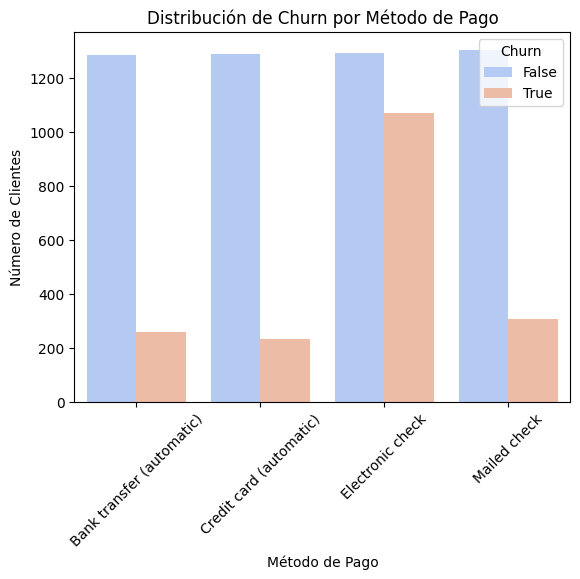

In [70]:
#Los clientes que pagan con Mailed Check enfrentan más churn

sns.countplot(x=clean_df['PaymentMethod'], hue=clean_df['Churn'], palette='coolwarm')
plt.xlabel('Método de Pago')
plt.ylabel('Número de Clientes')
plt.title('Distribución de Churn por Método de Pago')
plt.xticks(rotation=45)
plt.show()


Este gráfico muestra cómo se distribuyen los clientes que han churned y los que han permanecido en la empresa según los diferentes métodos de pago:

- Electronic check
Es el método de pago con la mayor cantidad de clientes churned por un margen considerable.

Aunque también tiene un número significativo de clientes que no han abandonado, la proporción de churn dentro de este grupo es la más alta.

- Mailed check
Es el segundo método con más clientes churned, aunque en menor cantidad que el Electronic check.

- Bank transfer (automatic) y Credit card (automatic)
Estos dos métodos de pago automáticos tienen considerablemente menos clientes churned en comparación con los cheques electrónicos y enviados por correo.

La gran mayoría de los clientes que usan métodos automáticos no abandonan el servicio.

- Conclusión
Este gráfico sugiere que el método de pago está relacionado con el churn. Los clientes que utilizan cheques electrónicos o enviados por correo parecen tener una mayor propensión a abandonar, en comparación con aquellos que usan métodos automáticos como transferencias bancarias o tarjetas de crédito.

- Posibles razones
Menor compromiso: Los clientes que pagan con cheque podrían estar menos involucrados o comprometidos con el servicio.

Asociación con contratos más cortos: Los pagos automáticos podrían estar vinculados a contratos de mayor duración o clientes que buscan estabilidad y comodidad.

Fricciones en el pago manual: Problemas como retrasos en pagos manuales podrían contribuir al churn.

Este hallazgo podría ayudar a identificar estrategias de fidelización basadas en facilidades de pago.

In [71]:
#Hay algún método de pago más común entre clientes antiguos y propensos a abandonar

payment_tenure = clean_df.groupby('PaymentMethod')['tenure'].mean()
payment_tenure



<ipython-input-71-3227278886>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  payment_tenure = clean_df.groupby('PaymentMethod')['tenure'].mean()


,tenure
PaymentMethod,
Bank transfer (automatic),43.656736
Credit card (automatic),43.269382
Electronic check,25.174630
Mailed check,21.830025


## Tablas cruzadas y Chi-cuadrado para variables categóricas

Analisando: gender


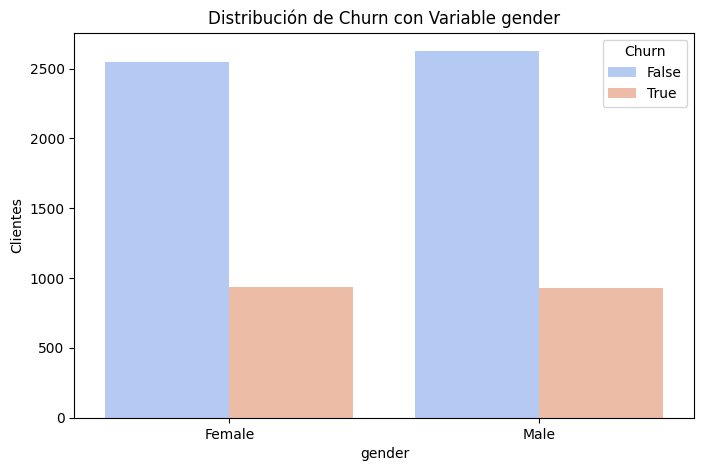


Crosstabulation:


Churn,False,True
gender,,
Female,2549,939
Male,2625,930



Resultados variable: gender:
Chi-Squared Statistic: 0.4841
P-value: 0.4866
Degrees of Freedom: 1


Analisando: SeniorCitizen


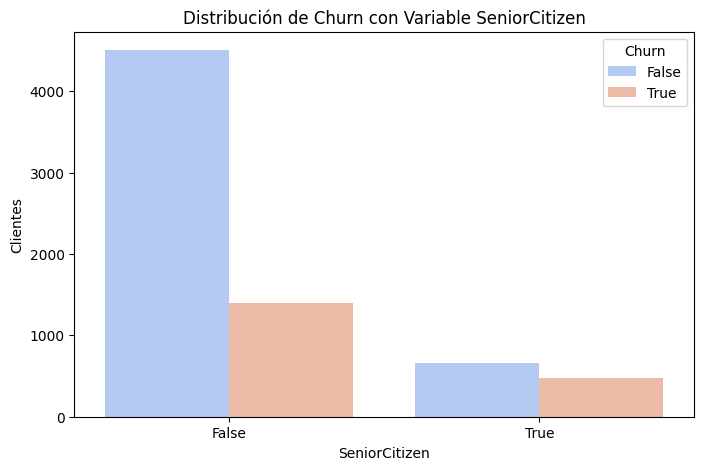


Crosstabulation:


Churn,False,True
SeniorCitizen,,
False,4508,1393
True,666,476



Resultados variable: SeniorCitizen:
Chi-Squared Statistic: 159.4263
P-value: 0.0000
Degrees of Freedom: 1


Analisando: Partner


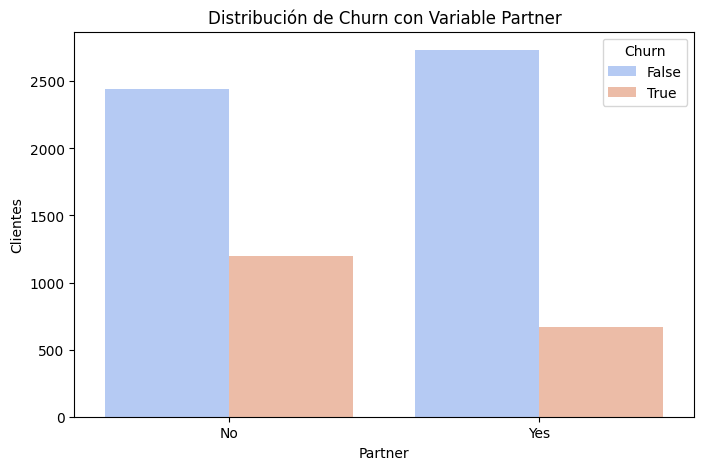


Crosstabulation:


Churn,False,True
Partner,,
No,2441,1200
Yes,2733,669



Resultados variable: Partner:
Chi-Squared Statistic: 158.7334
P-value: 0.0000
Degrees of Freedom: 1


Analisando: Dependents


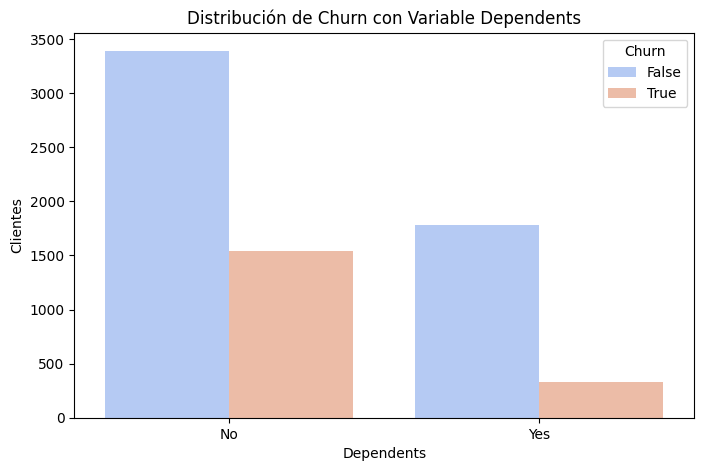


Crosstabulation:


Churn,False,True
Dependents,,
No,3390,1543
Yes,1784,326



Resultados variable: Dependents:
Chi-Squared Statistic: 189.1292
P-value: 0.0000
Degrees of Freedom: 1


Analisando: PhoneService


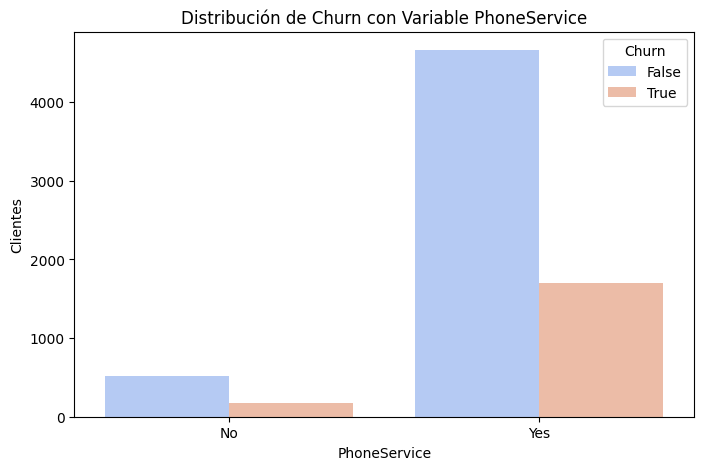


Crosstabulation:


Churn,False,True
PhoneService,,
No,512,170
Yes,4662,1699



Resultados variable: PhoneService:
Chi-Squared Statistic: 0.9150
P-value: 0.3388
Degrees of Freedom: 1


Analisando: MultipleLines


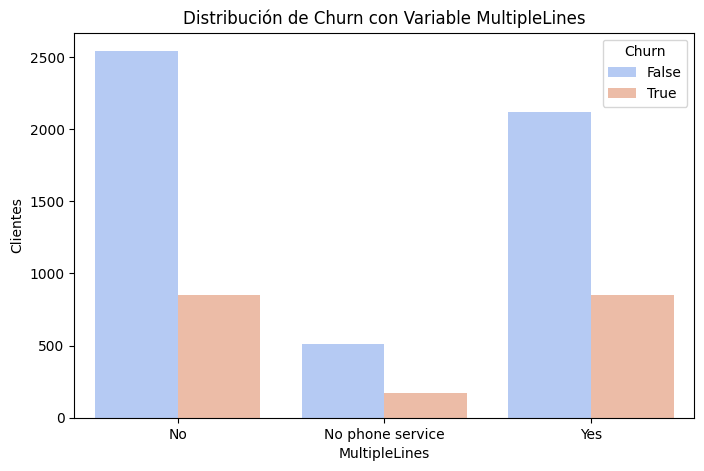


Crosstabulation:


Churn,False,True
MultipleLines,,
No,2541,849
No phone service,512,170
Yes,2121,850



Resultados variable: MultipleLines:
Chi-Squared Statistic: 11.3304
P-value: 0.0035
Degrees of Freedom: 2


Analisando: InternetService


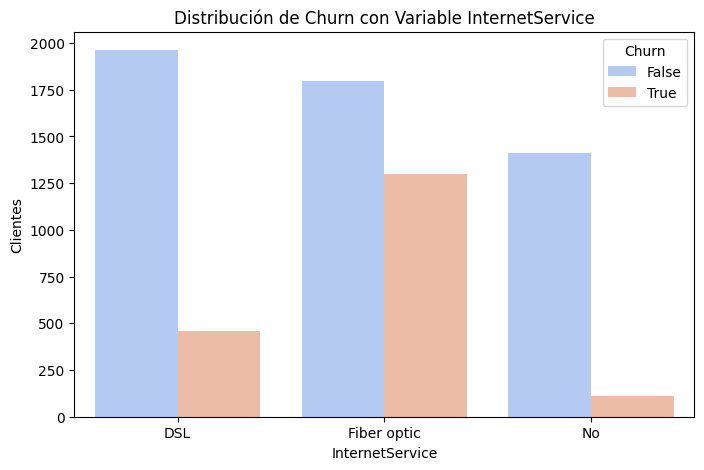


Crosstabulation:


Churn,False,True
InternetService,,
DSL,1962,459
Fiber optic,1799,1297
No,1413,113



Resultados variable: InternetService:
Chi-Squared Statistic: 732.3096
P-value: 0.0000
Degrees of Freedom: 2


Analisando: OnlineSecurity


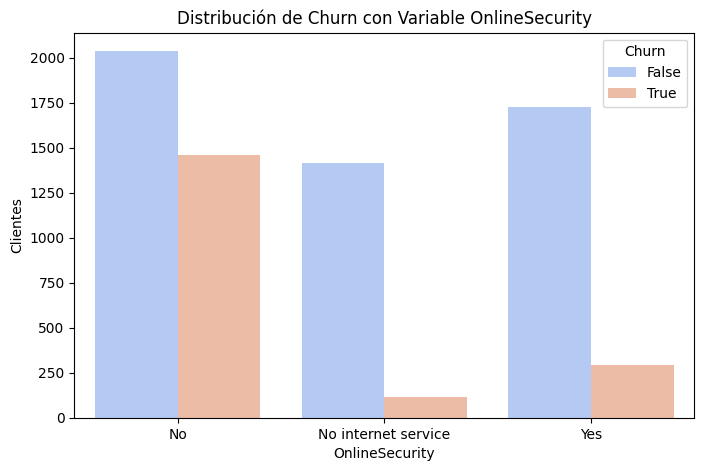


Crosstabulation:


Churn,False,True
OnlineSecurity,,
No,2037,1461
No internet service,1413,113
Yes,1724,295



Resultados variable: OnlineSecurity:
Chi-Squared Statistic: 849.9990
P-value: 0.0000
Degrees of Freedom: 2


Analisando: OnlineBackup


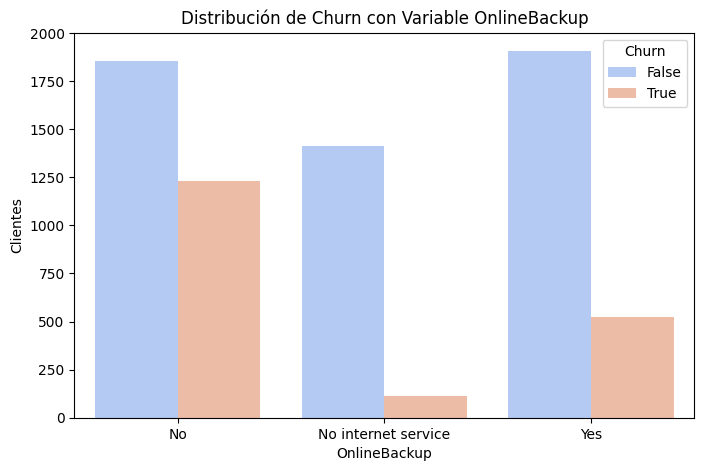


Crosstabulation:


Churn,False,True
OnlineBackup,,
No,1855,1233
No internet service,1413,113
Yes,1906,523



Resultados variable: OnlineBackup:
Chi-Squared Statistic: 601.8128
P-value: 0.0000
Degrees of Freedom: 2


Analisando: DeviceProtection


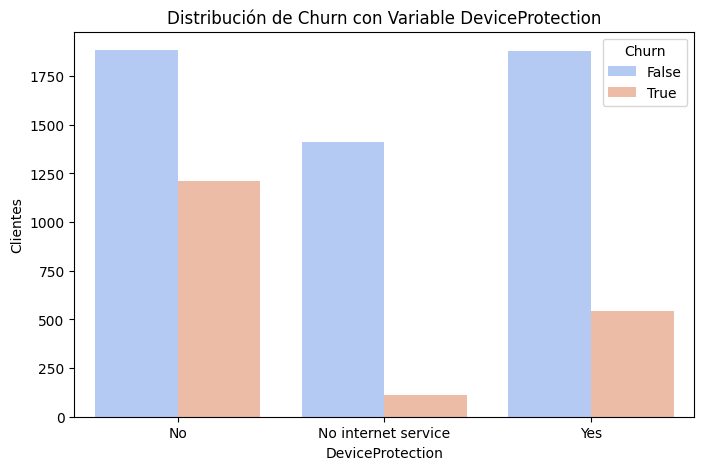


Crosstabulation:


Churn,False,True
DeviceProtection,,
No,1884,1211
No internet service,1413,113
Yes,1877,545



Resultados variable: DeviceProtection:
Chi-Squared Statistic: 558.4194
P-value: 0.0000
Degrees of Freedom: 2


Analisando: TechSupport


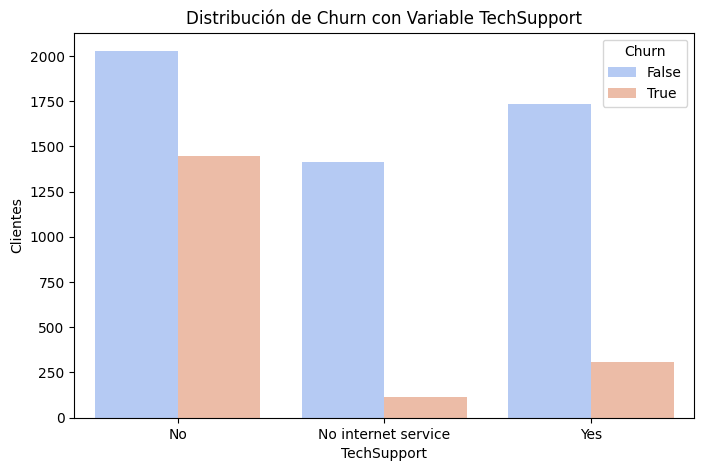


Crosstabulation:


Churn,False,True
TechSupport,,
No,2027,1446
No internet service,1413,113
Yes,1734,310



Resultados variable: TechSupport:
Chi-Squared Statistic: 828.1971
P-value: 0.0000
Degrees of Freedom: 2


Analisando: StreamingTV


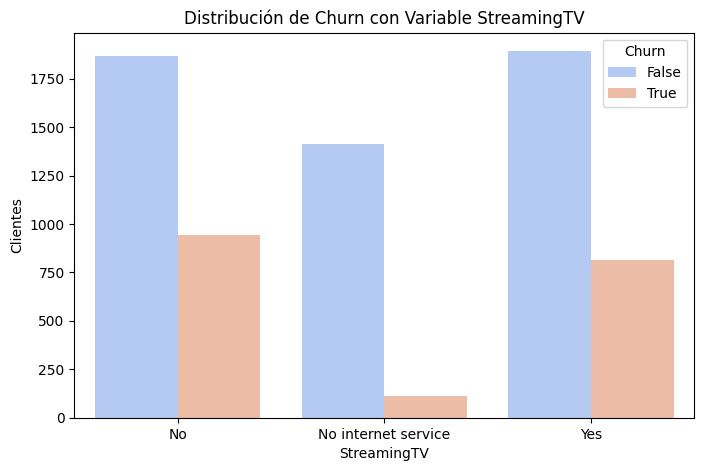


Crosstabulation:


Churn,False,True
StreamingTV,,
No,1868,942
No internet service,1413,113
Yes,1893,814



Resultados variable: StreamingTV:
Chi-Squared Statistic: 374.2039
P-value: 0.0000
Degrees of Freedom: 2


Analisando: StreamingMovies


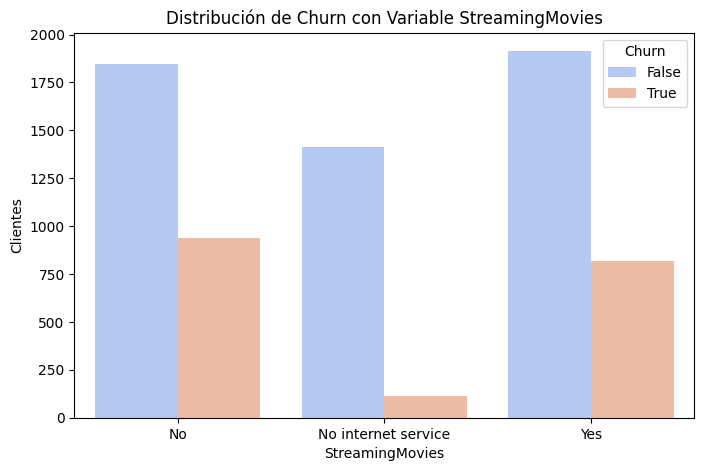


Crosstabulation:


Churn,False,True
StreamingMovies,,
No,1847,938
No internet service,1413,113
Yes,1914,818



Resultados variable: StreamingMovies:
Chi-Squared Statistic: 375.6615
P-value: 0.0000
Degrees of Freedom: 2


Analisando: PaperlessBilling


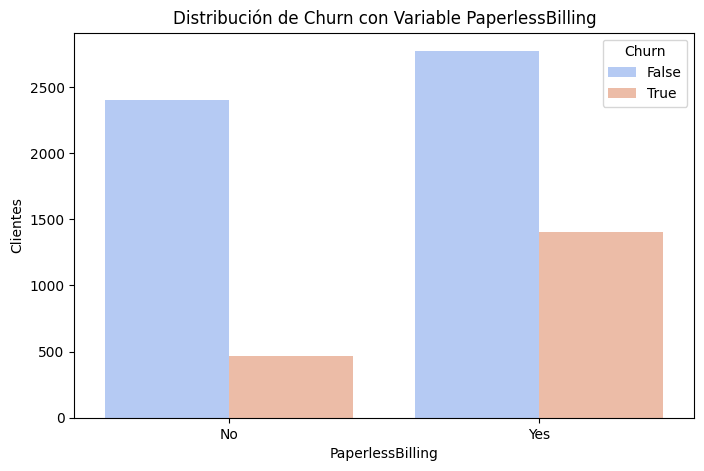


Crosstabulation:


Churn,False,True
PaperlessBilling,,
No,2403,469
Yes,2771,1400



Resultados variable: PaperlessBilling:
Chi-Squared Statistic: 258.2776
P-value: 0.0000
Degrees of Freedom: 1




In [72]:
from scipy.stats import chi2_contingency

# Categorías por analisar
categorical_cols = [
    'gender',
    'SeniorCitizen',
    'Partner',
    'Dependents',
    'PhoneService',
    'MultipleLines',
    'InternetService',
    'OnlineSecurity',
    'OnlineBackup',
    'DeviceProtection',
    'TechSupport',
    'StreamingTV',
    'StreamingMovies',
    'PaperlessBilling'
]

for col in categorical_cols:
    print(f"Analisando: {col}")

    # Graficas de barras
    plt.figure(figsize=(8, 5))
    sns.countplot(x=clean_df[col], hue=clean_df['Churn'], palette='coolwarm')
    plt.title(f'Distribución de Churn con Variable {col}')
    plt.xlabel(col)
    plt.ylabel('Clientes')
    if len(clean_df[col].unique()) > 5:
        plt.xticks(rotation=45, ha='right')
    plt.show()

    # Tablas de frecuencia
    crosstab_result = pd.crosstab(clean_df[col], clean_df['Churn'])
    print("\nCrosstabulation:")
    display(crosstab_result)

    # Test Chi-Squared
    chi2, p, dof, expected = chi2_contingency(crosstab_result)
    print(f"\nResultados variable: {col}:")
    print(f"Chi-Squared Statistic: {chi2:.4f}")
    print(f"P-value: {p:.4f}")
    print(f"Degrees of Freedom: {dof}")
    print("\n" + "="*50 + "\n")

Basado en los valores-P obtenidos a través de los tests Chi-cuadrada, las tres variables a continuación muestran la correlación con churn mas fuerte.

1. Seguridad en línea: (Estadístico Chi-Cuadrado: 849.9990, Valor P: 0.0000)

2. Soporte técnico: (Estadístico Chi-Cuadrado: 828.1971, Valor P: 0.0000)

3. Servicio de internet: (Estadístico Chi-Cuadrado: 732.3096, Valor P: 0.0000)

**OnlineSecurity:**


**Relación:** Los clientes que no tienen seguridad en línea tienen una probabilidad significativamente mayor de cancelar el servicio en comparación con aquellos que sí la tienen. La categoría "Sin servicio de internet" también tiene una baja tasa de churn, lo cual es esperado, ya que estos clientes no tienen la opción de seguridad en línea.

**Conclusión:** Esto sugiere que la seguridad en línea es un servicio valioso para los clientes, y su ausencia está asociada con un mayor riesgo de abandono.

**TechSupport:**

**Relación:** Similar a la seguridad en línea, los clientes que no tienen soporte técnico presentan una tasa de churn mucho más alta en comparación con aquellos que sí lo tienen. Nuevamente, los clientes con "Sin servicio de internet" tienen un churn bajo.

**Conclusión:** Esto indica que el acceso a soporte técnico es crucial para la retención de clientes. Aquellos que sienten que no reciben apoyo son más propensos a cancelar el servicio.

**InternetService:¨**

**Relación:** Los clientes que tienen servicio de internet de fibra óptica presentan una tasa de churn significativamente más alta en comparación con aquellos que usan DSL o no tienen servicio de internet.

**Conclusión:** Este es un hallazgo clave. Puede indicar problemas específicos con el servicio de fibra óptica, como calidad, costos o factores adicionales que afectan la satisfacción del cliente.


## Creando la columna Cuentas_diarias

In [73]:
# Crear la nueva columna 'Cuentas_diarias' dividiendo MonthlyCharges entre 30
clean_df["Cuentas_diarias"] = clean_df["MonthlyCharges"] / 30

# Renombrar el dataframe
df_gasto_diario = clean_df.copy()

# Verificar que la nueva columna se agregó correctamente
df_gasto_diario.head()


,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Cuentas_diarias
0,False,Female,False,Yes,Yes,9,Yes,No,DSL,No,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.186667
1,False,Male,False,No,No,9,Yes,Yes,DSL,No,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,1.996667
2,True,Male,False,No,No,4,Yes,No,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.463333
3,True,Male,True,Yes,No,13,Yes,No,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.266667
4,True,Female,True,Yes,No,3,Yes,No,Fiber optic,No,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.796667


<ipython-input-74-1034825443>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_gasto_diario["Contract"], y=df_gasto_diario["Cuentas_diarias"], palette="coolwarm")


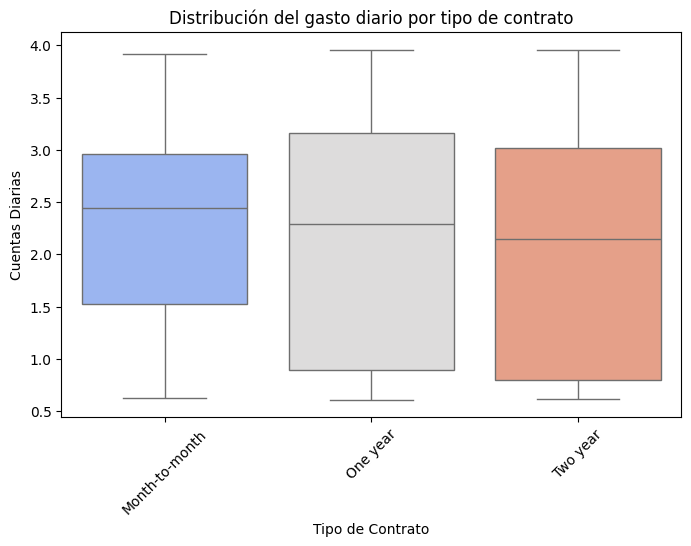

In [74]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_gasto_diario["Contract"], y=df_gasto_diario["Cuentas_diarias"], palette="coolwarm")

plt.title("Distribución del gasto diario por tipo de contrato")
plt.xlabel("Tipo de Contrato")
plt.ylabel("Cuentas Diarias")
plt.xticks(rotation=45)
plt.show()


Resumen:
El análisis de estas tres principales variables destaca que los clientes son más propensos a cancelar el servicio si: ✅ No tienen seguridad en línea. ✅ No tienen soporte técnico. ✅ Utilizan internet de fibra óptica.

Estos resultados señalan áreas en las que Telecom X podría enfocarse para reducir el churn, como mejorar la calidad percibida del servicio de fibra óptica y resaltar los beneficios de la seguridad en línea y el soporte técnico.

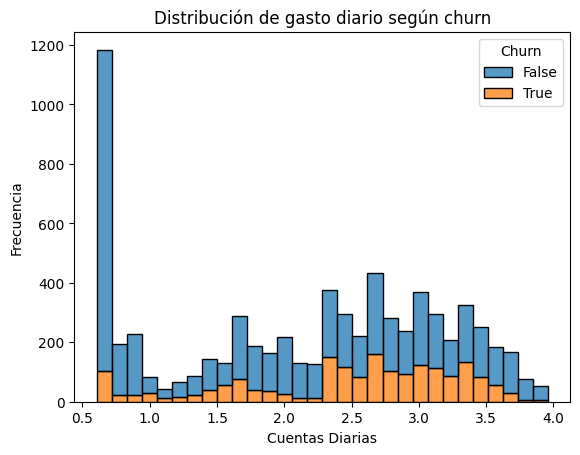

In [75]:
sns.histplot(df_gasto_diario, x="Cuentas_diarias", hue="Churn", multiple="stack", bins=30)
plt.title("Distribución de gasto diario según churn")
plt.xlabel("Cuentas Diarias")
plt.ylabel("Frecuencia")
plt.show()


<ipython-input-76-1871075499>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df_gasto_diario["PaymentMethod"], y=df_gasto_diario["Cuentas_diarias"], palette="flare")


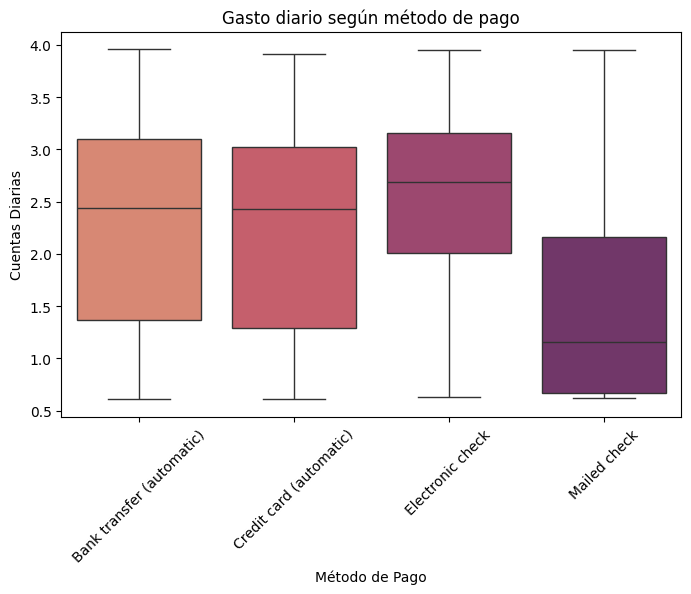

In [76]:
plt.figure(figsize=(8,5))
sns.boxplot(x=df_gasto_diario["PaymentMethod"], y=df_gasto_diario["Cuentas_diarias"], palette="flare")

plt.title("Gasto diario según método de pago")
plt.xlabel("Método de Pago")
plt.ylabel("Cuentas Diarias")
plt.xticks(rotation=45)
plt.show()


Distribución del gasto diario por tipo de contrato
Insight: Este gráfico de caja muestra claramente que los clientes con contratos mensuales tienden a tener cargos diarios más altos en promedio en comparación con aquellos con contratos de uno o dos años.

Conexión con el churn: Esto refuerza el hallazgo previo de que los contratos mensuales están asociados con una mayor tasa de abandono. El mayor costo diario puede ser un factor que impulse la cancelación del servicio, ya que los clientes podrían percibir menos valor por su gasto diario en comparación con quienes tienen contratos de mayor duración y tarifas más bajas.

Distribución del gasto diario según churn (cell_id: 6jA0ZWXYIXkQ)
Insight: Este histograma muestra que los clientes que cancelaron el servicio (color naranja/rojo) se concentran en los rangos más altos de gasto diario, mientras que los clientes que no cancelaron (azul) tienen una distribución más dispersa y mayor presencia en valores bajos de gasto diario.

Conexión con el churn: Esto respalda directamente la idea de que un costo diario más alto está asociado con una mayor probabilidad de cancelación. Los clientes que pagan más al día son más propensos a abandonar el servicio.

Gasto diario según método de pago (cell_id: yXJCK78ZIgBb)
Insight: Este gráfico de caja indica que los clientes que utilizan Electronic Check como método de pago tienen, en promedio, gastos diarios más altos en comparación con quienes usan Cheque por correo, Transferencia bancaria o Tarjeta de crédito automática.

Conexión con el churn: Este hallazgo es interesante, ya que previamente identificamos que los usuarios de Electronic Check también tienen una mayor tasa de churn. Este gráfico sugiere que el mayor churn de estos clientes podría estar relacionado con sus mayores costos diarios. Es posible que los clientes con facturas más altas prefieran los pagos electrónicos, o que haya un factor subyacente que vincule el alto costo diario, los pagos electrónicos y el churn.


**Tareas clave**

✅ Importar y manipular datos desde una API de manera eficiente.

✅ Aplicar los conceptos de ETL (Extracción, Transformación y Carga) en la preparación de los datos.

✅ Crear visualizaciones estratégicas para identificar patrones y tendencias.

✅ Realizar un Análisis Exploratorio de Datos (EDA) y generar un informe con insights relevantes.


# RESULTADOS

Hallazgos clave hasta ahora:


- Distribución del Churn: Hay un desequilibrio en el conjunto de datos, con significativamente más clientes que no han abandonado en comparación con los que sí lo han hecho.


- Tenure y Churn: Los clientes con menor tiempo en la empresa tienen una mayor probabilidad de churn en comparación con aquellos con mayor tenure. El gráfico de cajas mostró una clara diferencia en la distribución de tenure entre los dos grupos, con una mediana de tenure mucho más baja en los clientes que han churned.


- Cargos mensuales y Churn: Los clientes con cargos mensuales más altos parecen tener una mayor propensión a abandonar, especialmente los clientes más nuevos (como se observó en el gráfico de dispersión). El boxplot confirmó que los clientes churned tienden a tener tarifas mensuales más altas en promedio.


- Cargos totales y Churn: Los clientes que han abandonado presentan significativamente menores cargos totales, lo que es esperado dado su menor tenure. Esto sugiere que la empresa está perdiendo clientes relativamente temprano en su ciclo de vida.


- Tipo de contrato y Churn: El tipo de contrato es un fuerte predictor del churn. Los clientes con contratos mes a mes tienen una tasa de abandono mucho mayor en comparación con los clientes con contratos de uno o dos años. El test de ANOVA confirmó una diferencia estadísticamente significativa en los cargos mensuales promedio según el tipo de contrato, con los contratos mes a mes teniendo tarifas más altas.


- Método de pago y Churn: El método de pago también está relacionado con el churn. Los clientes que utilizan cheques electrónicos y enviados por correo parecen tener una mayor tasa de churn en comparación con aquellos que usan métodos de pago automáticos como transferencias bancarias o tarjetas de crédito.


- Conclusión general
Los clientes más nuevos, con contratos mes a mes, que tienen cargos mensuales más altos y que usan métodos de pago no automáticos son un grupo de alto riesgo para el churn

Conclusiones generales del análisis de Cuentas_diarias
La variable Cuentas_diarias nos da una perspectiva valiosa. Destaca que costos diarios más altos están fuertemente asociados con el churn, especialmente para clientes con contratos mensuales y aquellos que usan Electronic Check como método de pago.

Esto refuerza los hallazgos previos sobre la importancia del tipo de contrato y el método de pago, agregando la dimensión de gasto diario como un posible impulsor del churn. Sugiere que los clientes pueden ser más sensibles al costo diario y que, cuando este es alto (especialmente en contratos de mes a mes o ciertos métodos de pago), es más probable que cancelen el servicio.

Estos insights son clave para identificar segmentos de clientes y escenarios donde el riesgo de churn es más alto debido a la percepción del costo diario. 📊💡

# CONTROL DE VERSIONES DE LA BASES DE DATOS


- df	        Raw DataFrame con los datos originales extraídos

- df_customer	Normalización de la columna

- df_phone	  Normalización de la columna phone	PhoneService

- df_internet	Normalización de la columna internet

- df_account	Normalización de la columna account	Contract

- df_final	  DataFrame consolidado

- Dataframe	  Versión refinada, con customerID eliminado

- df_churn    la columna churn es bool

- df_churn_senior la columna gender es category y SeniorCitizen es bool

- df_churn_partner  se convierte partner en category

- df_churn_category adicionalmente las columnas Dependents, PhoneService y PaperlessBilling se convierten en categorías

- df_churn_services las columnas MultipleLines / InternetService / OnlineSecurity / OnlineBackup / DeviceProtection / TechSupport / StreamingTV / StreamingMovies / Contract se transforman a categorias

- df_churn_payment PaymentMethod se transforma a categoria

- clean_df  dataframe listo para el análisis

- df_gasto_diario clean_df con columa Cuentas_diarias

# CONTROL DE GRÁFICAS ALMACENADAS



1.   distribucion_churn.png (Gráfica de barras con la distribución básica de churn

2.   Elemento de la lista


